In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# #Reviewer: The code works well localy 

In [2]:
f = lambda x : (x-1)**4+x**2
f_deriv=lambda x: 4*(x-1)**3+2*x
g=lambda x: x+3

In [3]:
#Will plot the function with the values received as parameters
def print_a_function(f,values):
    plt.plot(values,f(values))

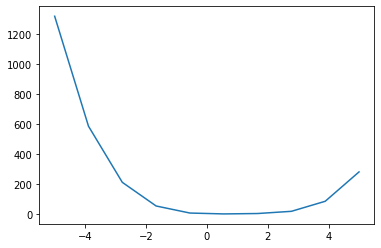

In [4]:
val=np.linspace(-5,5,10)
print_a_function(f,val)

In [7]:
def find_root_bisection(f,minVal,maxVal):
    if minVal >= maxVal:
        print(" max must be greater than min")
    precision=0.001
    fmin=f(minVal)
    fmax=f(maxVal)
           
    while abs(maxVal-minVal)>0.001:
        midVal=(minVal+maxVal)/2
        fmid=f(midVal)
        if abs(fmid)<precision:
            return midVal
        if fmin*fmid <0:
            maxVal=midVal
        else: 
            minVal=midVal
    print(" The function doesn't have a zero on the selected range")

In [8]:
find_root_bisection(g,-5,4)

-3.00048828125

# Newton-raphson methode

In [9]:
def find_root_newton_raphson(f,f_deriv,currentGuess,maxIter=5000):
    newGuess=currentGuess - f(currentGuess)/f_deriv(currentGuess)
    for i in range(maxIter): 
#         print(abs(currentGuess-newGuess),f(currentGuess))
        #Check for convergence
        if abs(f(currentGuess))<0.001:
            return currentGuess
        
        #Check for division by zero (or near-zero)
        if abs(f_deriv(currentGuess))<0.001:
            print("Derivative is close to zero , Newton-Raphson may diverge")
            return None
        #update guess using Newton_Raphson formula
        currentGuess=newGuess
        newGuess=currentGuess - f(currentGuess)/f_deriv(currentGuess)
    #Handle non-convergence
    print("Warning : newton-Raphson method did not converge with",maxIter,"iterations")
    return None

In [11]:
currentGuess=find_root_newton_raphson(f,f_deriv,1)
print(currentGuess)

Derivative is close to zero , Newton-Raphson may diverge
None


# Gradient_descent

In [12]:
def gradient_descent(f,f_deriv,start,learning_rate=0.01,maxIter=1000):
    for i in range(maxIter):
        if abs(f_deriv(start))<0.001:
            print(f_deriv(start))
            return start
        else:
            start=start-learning_rate*f_deriv(start)
    print(f"Gardient descent doesn't converge within {maxIter},iterations ")

In [13]:
x_min=gradient_descent(f,f_deriv,5)
f_min=f(x_min)
print(f"x_min: {x_min}, f(x_min): {f_min}")

0.0009428489611894575
x_min: 0.4103982340750575, f(x_min): 0.2892734959503621


In [14]:
#checking if we get the coreect value using Brent's method
ret_val=optimize.minimize_scalar(f,method='brent')
print(f'x_min: {ret_val.x}, f(x_min): {ret_val.fun}')

x_min: 0.41024548853416215, f(x_min): 0.2892734239377779


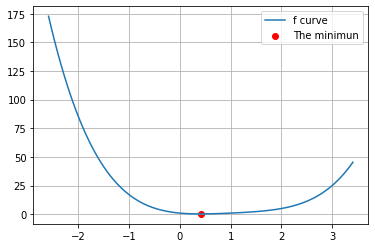

In [20]:
#plotting the f curve
x=np.linspace(ret_val.x-3,ret_val.x+3,100)
y=f(x)
plt.plot(x,y,label='f curve')

#Making the min in the curve
plt.scatter(ret_val.x,ret_val.fun,color="red",label='The minimun')

plt.grid()
plt.legend()

# Solving Linear problem

In [21]:
#Function that Solve the linear problem using simplex method
def solve_linear_problem(A,b,c):
    optimizeResult=optimize.linprog(A_ub=A,b_ub=b,c=c,method='simplex')
    optimal_val= -optimizeResult.fun
    optimal_x =optimizeResult.x
    return optimal_val,optimal_x

In [22]:
#Checking the optimal value
A = np.array([[2,1],[-4,5],[1,-2]])
b = np.array([10,8,3])
c = np.array([-1,-2])
optimal_value, optimal_arg = solve_linear_problem(A, b, c)
print("The optimal value is: ", optimal_value, " and is reached for x = ", optimal_arg)


The optimal value is:  11.0  and is reached for x =  [3. 4.]
